In [3]:
from superfv import AdvectionSolver, initial_conditions
from functools import partial
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def passive1(x, y, z):
    bounds = (1, 2)
    return (bounds[1] - bounds[0]) * np.where(np.abs(x - 0.5) < 0.25, 1, 0) + bounds[0]


N = 64
T = 1.0

solver3_a_priori_with_passive = AdvectionSolver(
    ic=partial(initial_conditions.sinus, vx=1),
    ic_passives={"passive1": passive1},
    nx=N,
    p=3,
    ZS=True,
    PAD={"rho": (0, 1)},
)
solver3_a_priori_with_passive.run(T)

solver3_a_posteriori_with_passive = AdvectionSolver(
    ic=partial(initial_conditions.sinus, vx=1),
    ic_passives={"passive1": passive1},
    nx=N,
    p=3,
    MOOD=True,
    NAD=1e-2,
    PAD={"rho": (0, 1)},
)
solver3_a_posteriori_with_passive.run(T)

100%|██████████| 1.0/1.0 [00:00]                 
100%|██████████| 1.0/1.0 [00:00]                 


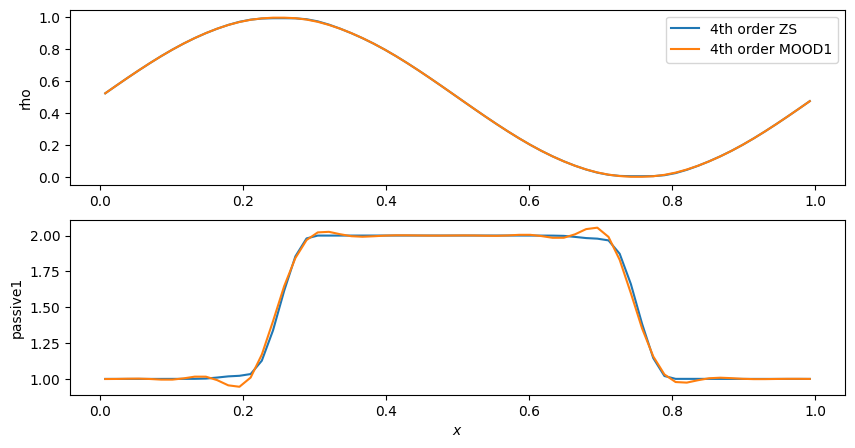

In [5]:
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
axs[0].set_ylabel("rho")
solver3_a_priori_with_passive.plot_1d_slice(
    axs[0], "rho", x=None, label="4th order ZS", xlabel=False
)
solver3_a_posteriori_with_passive.plot_1d_slice(
    axs[0], "rho", x=None, label="4th order MOOD1", xlabel=False
)
axs[1].set_ylabel("passive1")
solver3_a_priori_with_passive.plot_1d_slice(
    axs[1], "passive1", x=None, label="4th order ZS"
)
solver3_a_posteriori_with_passive.plot_1d_slice(
    axs[1], "passive1", x=None, label="4th order MOOD1"
)
axs[0].legend()